In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:
dataset = pd.read_excel('IC50 dataset.xlsx')
dataset.sample(10)

,Strains name,MICs_NOV,MICs_ERY,MICs_SDS,IC50s_NOV,IC50s_ERY,IC50s_SDS
385,AcrA_320,128,256,1024,67.368421,128.000000,514.572864
49,AcrA_309,4,2,8,2.105263,1.000000,4.020101
22,AcrA_141,2,4,8,1.000000,2.222222,4.705882
321,AcrA_180,256,256,512,128.000000,142.222222,301.176471
98,AcrA_389,2,4,16,1.052632,2.000000,8.040201
82,AcrA_285,2,4,16,1.052632,2.000000,8.040201
55,AcrA_369,4,2,8,2.105263,1.000000,4.020101
75,AcrA_201,2,2,16,1.052632,1.000000,8.040201
174,AcrA_174,16,8,64,8.000000,4.444444,37.647059
13,AcrA_65,2,2,8,1.111111,1.176471,4.210526


In [3]:
dataset.columns

Index(['Strains name', 'MICs_NOV', 'MICs_ERY', 'MICs_SDS', 'IC50s_NOV',
       'IC50s_ERY', 'IC50s_SDS'],
      dtype='object')

In [3]:
X = dataset.iloc[:, 1:2]
Y = dataset.iloc[:,4:5]

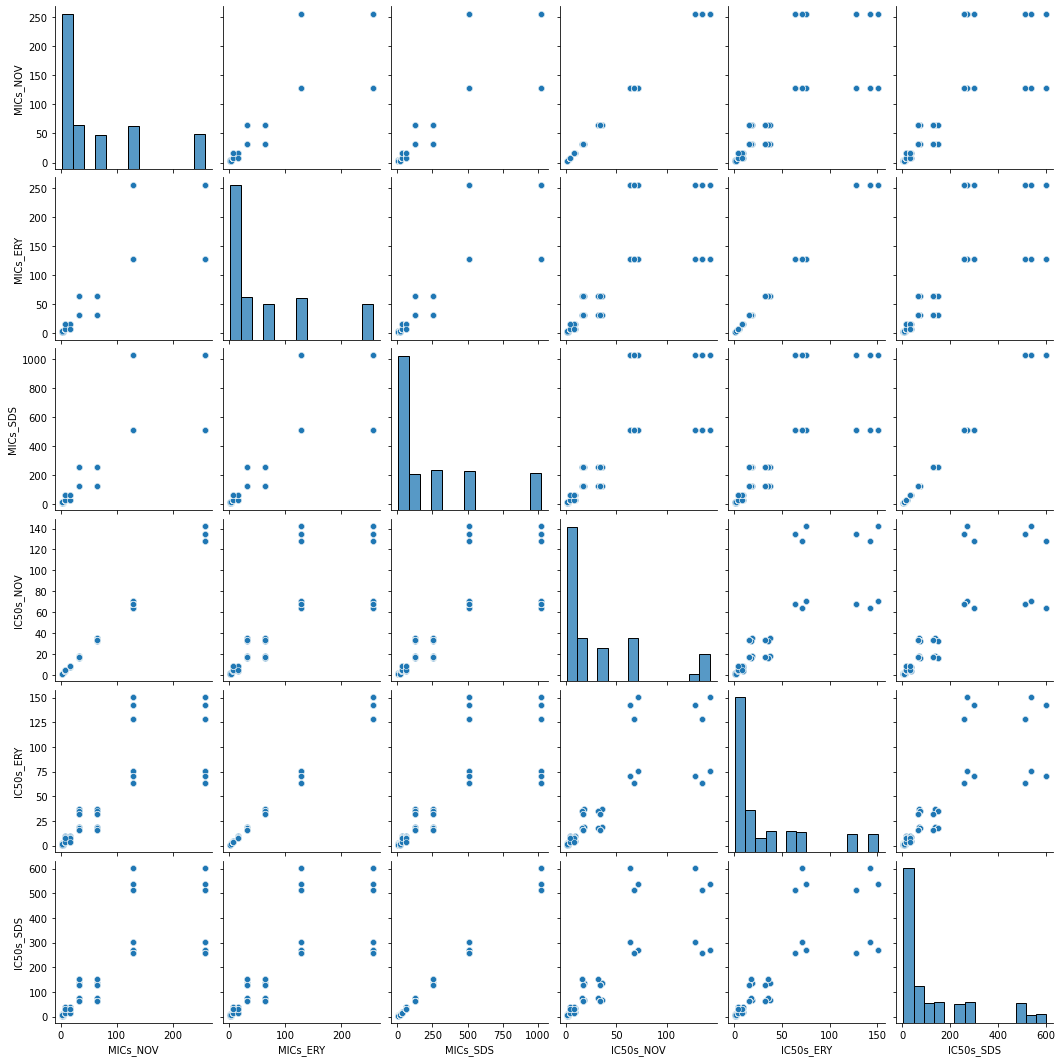

In [8]:
sns.pairplot(dataset)

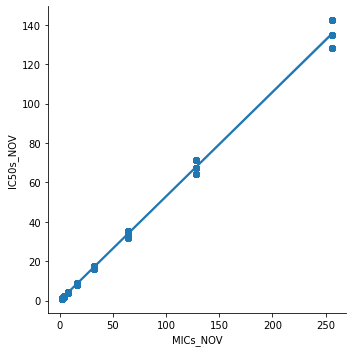

In [9]:
#linear plot
sns.lmplot(x='MICs_NOV',y ='IC50s_NOV', data=dataset)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
# coefficient value.... 
print('Coefficients: \n', lm.coef_)


Coefficients: 
 [[0.52947253]]


In [16]:
#prediction on test data
predictions = lm.predict(X_test)

     MICs_NOV
38          4
186         8
375       128
139         8
206        32
..        ...
179        16
106        16
41          4
31          2
32          4

[119 rows x 1 columns]


Text(0, 0.5, 'Predicted Y')

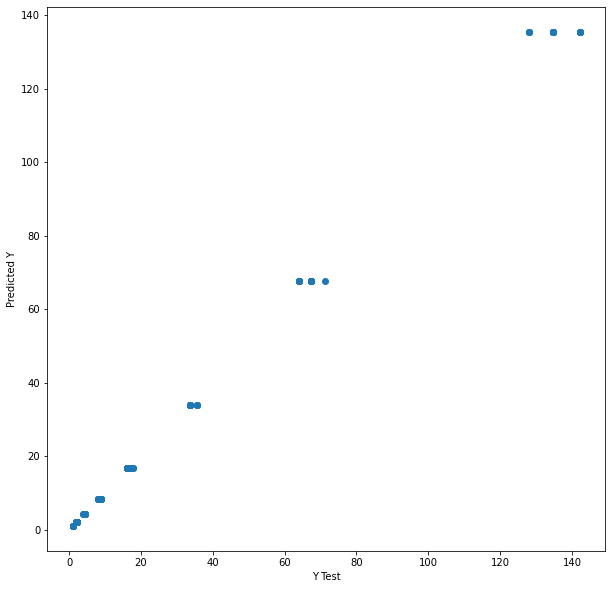

In [18]:
#scatter plot on prediction
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [19]:
# evaluating the model
#Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9191687945810021
MSE: 4.1913907886498825
RMSE: 2.047288643218118


In [22]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
MICs_NOV,0.529473


In [25]:
# predict the value
lm.predict([[6]])

C:\Users\anaconda_directory\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.10680818]])

#predict on a new value lets say our new value is 6 and we want to predict the IC50.

In [24]:
lm.predict([[6]])

C:\Users\anaconda_directory\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.10680818]])

Based on our model if the value of x or MICs_NOV = 6 then our predicted value based on our linear regression model is y = 3.11

# For MICs_ERY

In [26]:
X1 = dataset.iloc[:, 2:3]
Y1 = dataset.iloc[:,5:6]

In [27]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=101)

In [28]:
lm.fit(X1_train,y1_train)

LinearRegression()

In [29]:
# coefficient value.... 
print('Coefficients: \n', lm.coef_)


Coefficients: 
 [[0.53945246]]


In [30]:
#prediction on test data
predictions = lm.predict(X1_test)

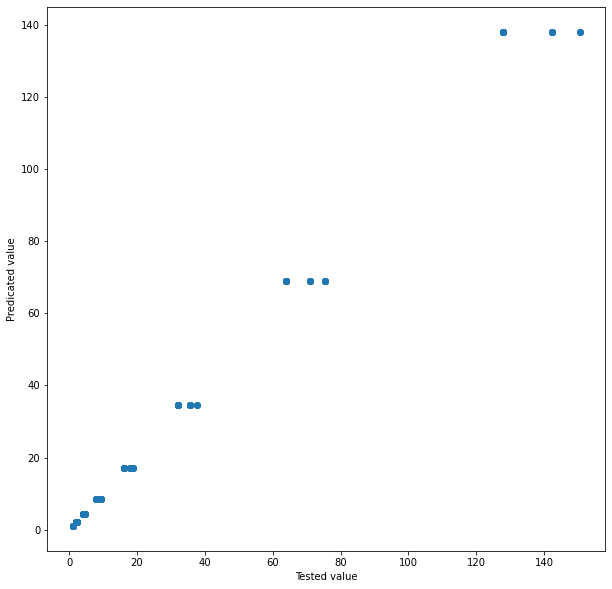

In [31]:
#scatter plot on prediction
plt.scatter(y1_test,predictions)
plt.xlabel('Tested value')
plt.ylabel('Predicated value')
plt.savefig("machine_learning.png", dpi = 300)

In [32]:
import itertools
#print (y1_test)
#print (predictions)
x1_test1 = X1_test.iloc [:, :1].values
y1_test1 = y1_test.iloc [:, :1].values
ab = itertools.chain (y1_test1)
#print (ab)

In [33]:
# evaluating the model
#Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y1_test, predictions))
print('MSE:', metrics.mean_squared_error(y1_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions)))

MAE: 2.1868402003821625
MSE: 14.581363690476358
RMSE: 3.818555183636392


In [19]:

# predict the value
X = float(input ("Enter the MIC"))
lm.predict([[X]])

Enter the MIC 4


C:\Users\anaconda_directory\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.04786312]])